In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import random
import copy

# Read Data

In [2]:
with open('circle.txt') as fc:
    circle = [[float(x) for x in line.split(',')] for line in fc]
#circle = np.asarray(circle)

with open('moon.txt') as fm:
    moon = [[float(x) for x in line.split(',')] for line in fm]
#moon = np.asarray(moon)

# Check

In [3]:
pltcx,pltcy = [],[]
for i in range(len(circle)):
    pltcx.append(circle[i][0])
    pltcy.append(circle[i][1])

pltmx,pltmy = [],[]
for i in range(len(moon)):
    pltmx.append(moon[i][0])
    pltmy.append(moon[i][1])

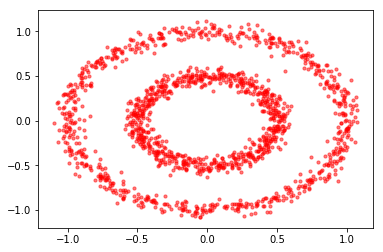

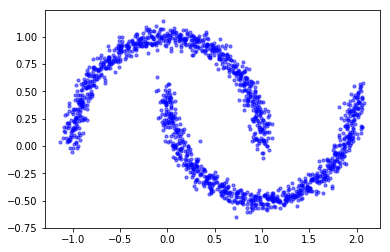

In [4]:
plt.scatter(pltcx, pltcy, s=10, c='r', alpha=0.5)
plt.show()

plt.scatter(pltmx, pltmy, s=10, c='b', alpha=0.5)
plt.show()

# Def

In [14]:
def randc(dim,k):
    c = []
    for i in range(k):
        center = []
        for d in range(dim):
            rand = random.uniform(-3,3)
            center.append(rand)
        c.append(center)
    return c

def cluster(data, centers, dims, firstCluster):
    for point in data:
        nearestCenter = 0
        nearestCenterDist = None
        for i in range(0, len(centers)):
            euclidean = 0
            for d in range(0, dims):
                dist = abs(point[d] - centers[i][d])
                euclidean += dist
            euclidean = np.sqrt(euclidean)
            if nearestCenterDist == None:
                nearestCenterDist = euclidean
                nearestCenter = i
            elif nearestCenterDist > euclidean:
                nearestCenterDist = euclidean
                nearestCenter = i
        if firstCluster:
            point.append(nearestCenter)
        else:
            point[-1] = nearestCenter

    return data

def meanc(data, centers, dims):
    print('centers:', centers)
    newCenters = []
    for i in range(len(centers)):
        newCenter = []
        npoints = 0
        points = []
        for point in data:
            if point[-1] == i:
                npoints += 1
                for dim in range(0,dims):
                    if dim < len(points):
                        points[dim] += point[dim]
                    else:
                        points.append(point[dim])
        if len(points) != 0:
            for dim in range(0,dims):
                newCenter.append(points[dim]/npoints)
            newCenters.append(newCenter)
        else: 
            newCenters.append(centers[i])
        
    return newCenters

def plotshow(clusterData, centers,iteration):   
    class2,class1,class0 = [],[],[]
    fileName = 'k-means{:d}.png'.format(iteration)
    for n in range(len(clusterData)):
        if clusterData[n][2]==1:
            class1.append(clusterData[n])
        elif clusterData[n][2]==0:
            class0.append(clusterData[n])
        else:
            class2.append(clusterData[n])
            
    class2 = np.asarray(class2)
    class1 = np.asarray(class1)
    class0 = np.asarray(class0)
    plt.title("iteration-" + str(iteration))
    plt.scatter(class1[: ,0],class1[: ,1], s=10, c='r')
    plt.scatter(class0[: ,0],class0[: ,1], s=10, c='blueviolet')
    plt.scatter(centers[0][0], centers[0][1],marker="*",s=40 ,c='blueviolet', edgecolors="black")
    plt.scatter(centers[1][0], centers[1][1],marker="*",s=40 ,c='r', edgecolors="black")
    if len(centers)>2:
        plt.scatter(class2[: ,0],class2[: ,1], s=10, c='b')
        plt.scatter(centers[2][0], centers[2][1],marker="*",s=40 ,c='b', edgecolors="black")
    plt.savefig(fileName)
    plt.show()

# k - means

centers: [[-1.1511279772820389, 2.4747475400087655], [-2.441545798933517, 1.0677961937293858]]


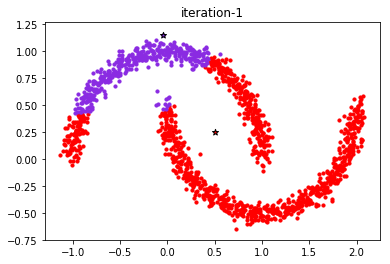

centers: [[-0.04741689237559191, 1.1425272983034653], [0.4997779826852366, 0.250879874306884]]


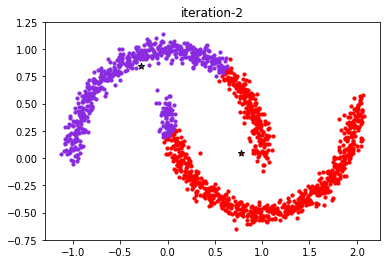

centers: [[-0.28348636464106014, 0.8412889543410939], [0.7744860012277551, 0.044242132154320775]]


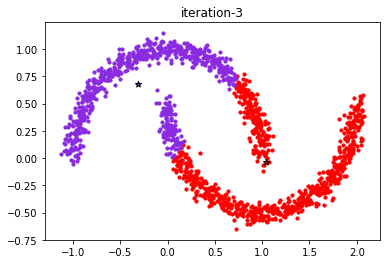

centers: [[-0.3149333111527699, 0.6837151353902612], [1.0438205774812117, -0.037487583409593316]]


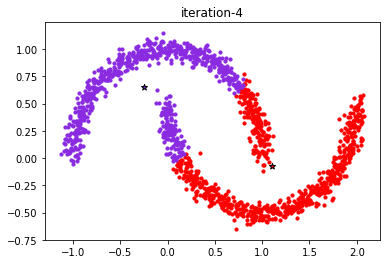

centers: [[-0.24838935762972775, 0.6562511893763239], [1.1030610226080872, -0.07527329879254757]]


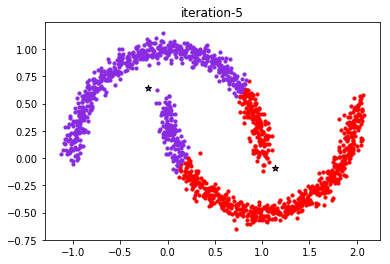

centers: [[-0.21226277759150972, 0.6405735313613169], [1.1339086543631676, -0.0954275255840209]]


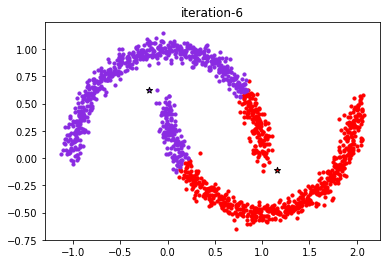

centers: [[-0.19256639982739812, 0.6285290402585941], [1.1554457805542797, -0.1059931694863002]]


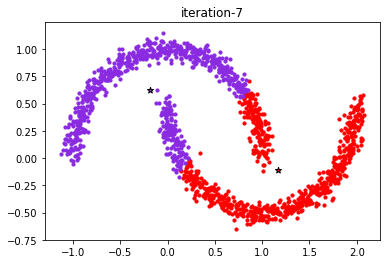

centers: [[-0.18246494712546282, 0.624723692010463], [1.1633471579284702, -0.11195272789923703]]


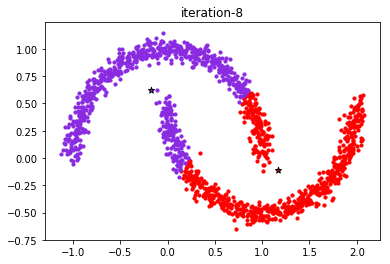

centers: [[-0.1784461623302594, 0.6216965470310819], [1.1682942650183286, -0.11384432934282594]]


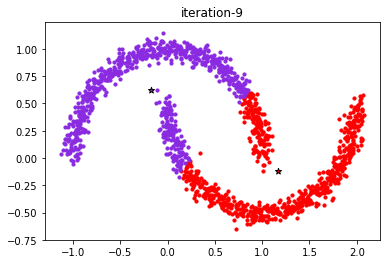

centers: [[-0.1727417117839685, 0.6205899718128549], [1.1715680839876947, -0.1176413599670917]]


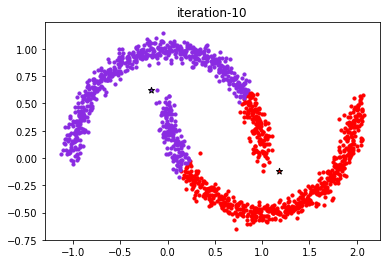

centers: [[-0.17091293259225707, 0.6196614628694468], [1.173323936446754, -0.11868176630147267]]


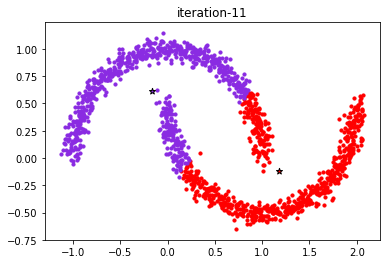

centers: [[-0.16911982335335368, 0.61869446356437], [1.1751154503501655, -0.11968386949492302]]


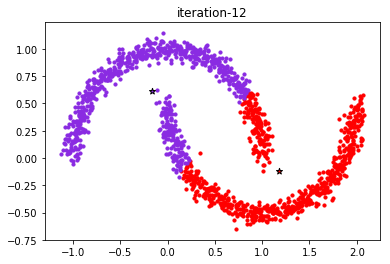

In [16]:
data = moon
k = 2
iteration = 0

centerProcess= []
dims = len(data[0])
centers = randc(dims,k)
centerProcess.append(centers)

clusterData = cluster(data, centers, dims, True)

while(True):
    iteration +=1
    newCenters = meanc(clusterData, centers, dims)
    centerProcess.append(newCenters)
    clusterData = cluster(data, newCenters, dims, False)
    plotshow(clusterData, newCenters, iteration)
    if centers == newCenters:
        break
    centers=newCenters

# Def

In [13]:
def initCentr(data, k):
    #centerMat = data[np.random.choice(len(data), k, replace=False)]
    for i in range(k):
        centerMat[i] = data[i]
    return centerMat

def RBF(data,sigma):
    nData = len(data)
    gramMat = np.zeros((nData,nData))
    for i in range(nData):
        delta = np.array(abs(data[i]-data[:]))
        sqrEuclid = (np.square(delta).sum(axis=1)).reshape(1,1500)
        gramMat[i] = np.exp(-(sqrEuclid)/(2*sigma**2))
    return gramMat

def plotshow(newCenter,clust,iteration):
    n = len(newCenter)
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.clf()
    plt.title("iteration-" + iteration)
    fileName = 'kernelk{:s}.png'.format(iteration)
    for i in range(n):
        col = next(color)
        memberC = np.asarray(clust[i])
        plt.scatter(memberC[:, 0], memberC[:, 1], s=8, c=col)
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    for i in range(n):
        col = next(color)
        plt.scatter(newCenter[i][0], newCenter[i][1], s=30, c=col, marker="*", edgecolors="black")
    plt.savefig(fileName)
    plt.show()

# kernel k-means (RBF)

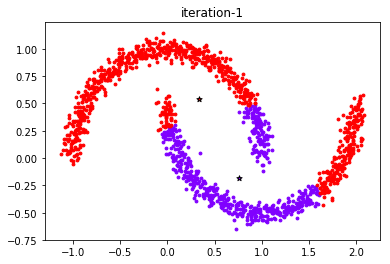

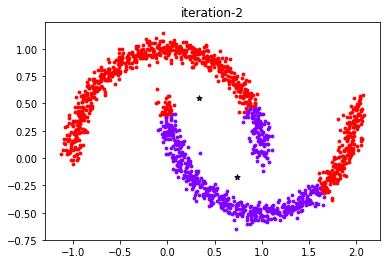

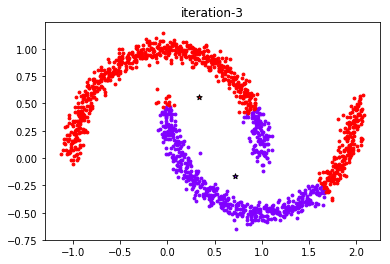

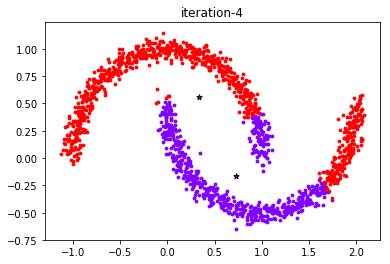

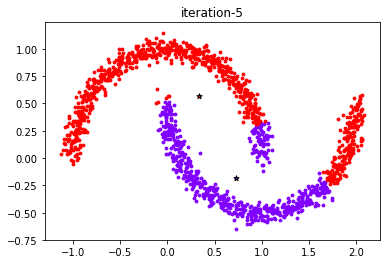

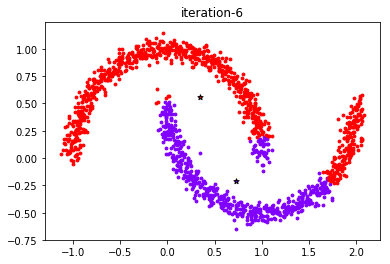

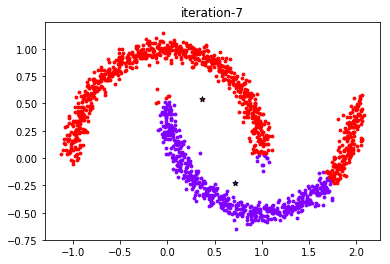

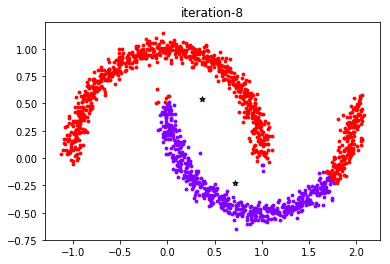

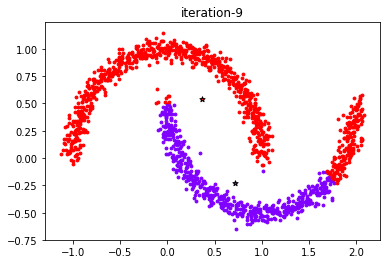

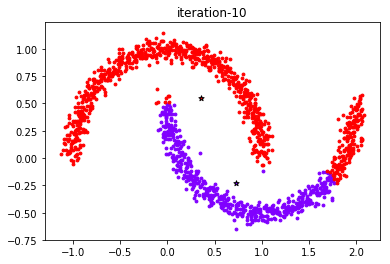

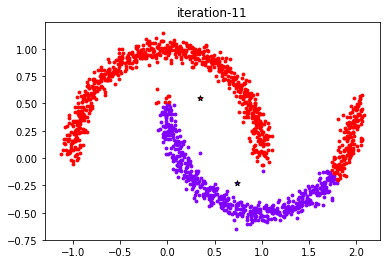

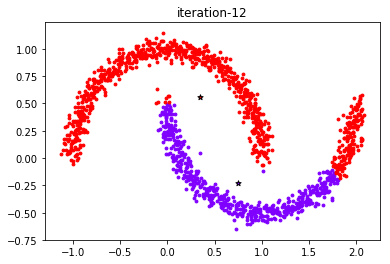

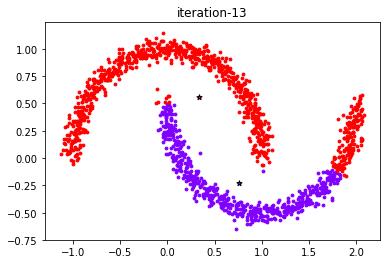

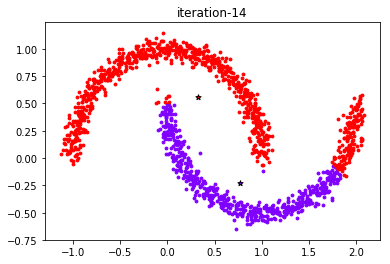

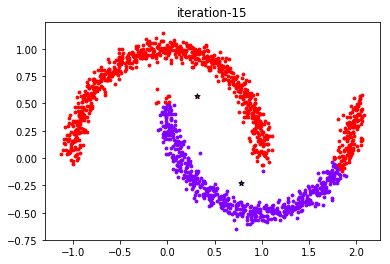

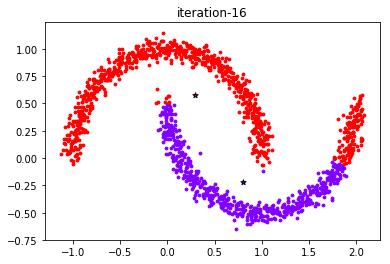

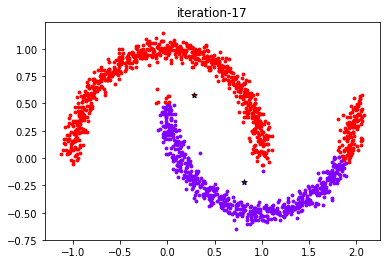

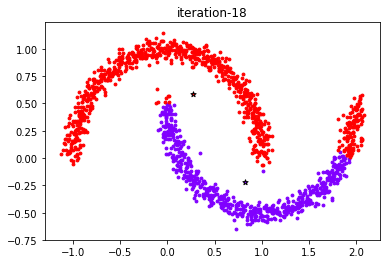

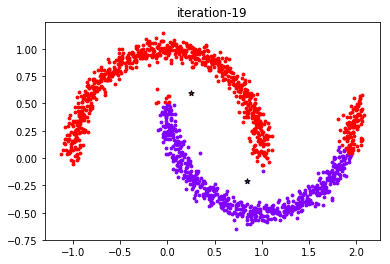

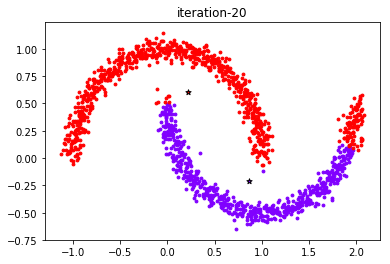

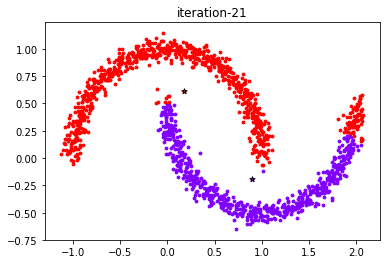

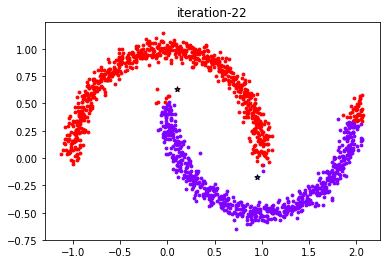

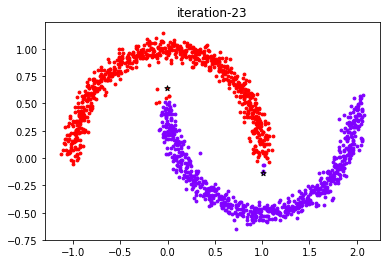

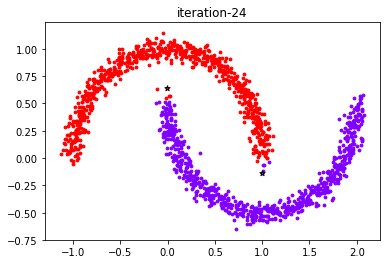

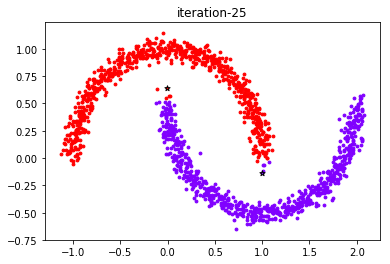

In [17]:
circle = np.asarray(circle)
moon = np.asarray(moon)

data = moon
k = 2
sigma = 0.25 # circle=0.15; moon =0.25
iteration = 0

clust = [[] for i in range(k)]
clustMat = [[] for i in range(k)]
newCenter = [[] for i in range(k)]
centerMat = np.zeros((k,len(data)))
newcenterMat = np.zeros((k,len(data)))

gramMat = RBF(data,sigma)# gramMat = 1500*1500
centerMat = initCentr(gramMat, k) #centerMat = k*1500

for ii in range(25):
    iteration+=1
    gramDist = [[] for i in range(k)] # gramDist = [[class0],[class1],[class2]] 
    for i in range(k):
        gramDist[i] = np.linalg.norm((gramMat-centerMat[i]),axis=1) 
    clustindex = np.argmin(gramDist, axis=0) #clustindex = 1500*1
    for i in range(k):
        clust[i] = data[np.where(clustindex[:] == i)]
        clustMat[i] = gramMat[np.where(clustindex[:] == i)]
    for i in range(k):
        newCenter[i]=(clust[i]).mean(axis=0)
        newcenterMat[i] = (clustMat[i]).mean(axis=0) #newcenterMat = k*1500
    plotshow(newCenter,clust,str(iteration))
    
    centerMat = newcenterMat

In [71]:
from scipy import linalg as LA

# Def

In [72]:
def initCentr(data, k):
    result = data[np.random.choice(len(data), k, replace=False)]
    return result

def Simmilarity(data,sigma):
    nData = len(data)
    result = np.zeros((nData,nData))
    for i in range(nData):
        delta = np.matrix(abs(data[i]-data[:]))
        sqrEuclid = (np.square(delta).sum(axis=1)).reshape(1,1500)
        result[i] = np.exp(-(sqrEuclid)/(2*sigma**2))
    return result

def Spectral(laplacian):
    global k
    e_vals, e_vecs =np.linalg.eig.eig(np.array(laplacian))
    ind = e_vals.real.argsort()[:k]
    result = np.ndarray(shape=(len(laplacian),0))
    for i in range(1, len(ind)):
        cor_e_vec = np.transpose(np.array(e_vecs[:,np.asscalar(ind[i])]))
        result = np.concatenate((result, cor_e_vec), axis=1)
    return result

In [73]:
def plotshow(cluster, center, iteration, converged):
    n = len(cluster)
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    fileName = 'spectral{:s}.png'.format(iteration)
    plt.title("iteration-" + iteration)
    for i in range(n):
        col = next(color)
        member = np.asmatrix(cluster[i])
        plt.scatter(np.ravel(member[:, 0]), np.ravel(member[:, 1]), s=5, c=col)
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    for i in range(n):
        col = next(color)
        plt.scatter(center[i, 0], center[i, 1], marker="*", s=30, c=col, edgecolors="black")
    if(converged == 0):
        plt.ion()
        plt.savefig(fileName)
        plt.show()
        plt.pause(0.1)
    if (converged == 1):
        plt.savefig(fileName)
        plt.show(block=True)

# spectral clustering (RBF)

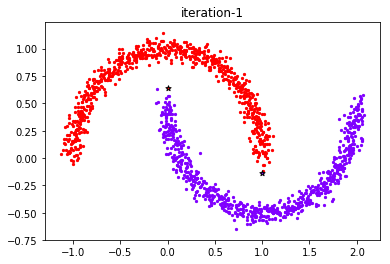

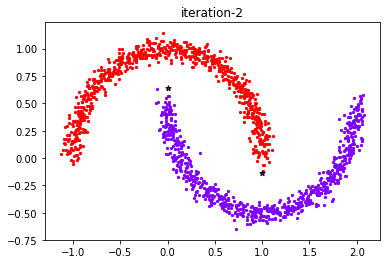

In [78]:
circle = np.asarray(circle)
moon = np.asarray(moon)

data = moon
k = 2
sigma = 0.1 #circle = 0.1
iteration = 0

simMat = Simmilarity(data,sigma)
degMat = np.diag(np.array(simMat.sum(axis=1)).ravel())
lapMat = degMat - simMat #unnormalizedLaplacian
DataT = Spectral(lapMat)
initC = initCentr(DataT, k)

nCluster = len(initC)

while(True):
    iteration +=1
    euclidean = np.ndarray(shape=(len(DataT), 0))
   
    for i in range(0, nCluster):
        centRe = np.repeat(initC[i, :], len(DataT), axis=0)
        deltaMat = abs(DataT- centRe)
        euclideanMat = np.sqrt(np.square(deltaMat).sum(axis=1))
        euclidean = np.concatenate((euclidean, euclideanMat), axis=1)
    clusterMat = np.ravel(np.argmin(np.matrix(euclidean), axis=1))
    clusterT = [[] for i in range(k)]
    clusterOri = [[] for i in range(k)]
    for i in range(0, len(DataT)):
        clusterT[np.asscalar(clusterMat[i])].append(np.array(DataT[i, :]).ravel())
        clusterOri[np.asscalar(clusterMat[i])].append(np.array(data[i, :]).ravel())
    
    newCTr = np.ndarray(shape=(0, len(initC[0])))
    newCOri = np.ndarray(shape=(0, len(data[0])))
    for i in range(0,nCluster):
        centroidTr = np.asmatrix(clusterT[i]).mean(axis=0)
        centroidOri = np.asmatrix(clusterOri[i]).mean(axis=0)
        newCTr = np.concatenate((newCTr, centroidTr), axis=0)
        newCOri = np.concatenate((newCOri, centroidOri), axis=0)
    plotshow(clusterOri, newCOri, str(iteration), 0)
    
    if((initC == newCTr).all()):
        break
    
    initC = newCTr

# DBSCAN

In [69]:
def regionQuery(data, point, eps):
    neighbors = []
    data = np.asarray(data)
    for Pn in range(0, len(data)):
        if np.linalg.norm(data[point] - data[Pn]) < eps:
            neighbors.append(Pn)
            
    return neighbors

def growCluster(data, labels, point, NeighborPts, cluster, eps, MinPts):
    labels[point] = cluster
    i = 0
    while i < len(NeighborPts): 
        Pn = NeighborPts[i]
        if labels[Pn] == -1:
            labels[Pn] = cluster
        elif labels[Pn] == 0:
            labels[Pn] = cluster
            PnNeighborPts = regionQuery(data, Pn, eps)
            if len(PnNeighborPts) >= MinPts:
                NeighborPts = NeighborPts + PnNeighborPts              
        i += 1        


data = moon
eps=0.05
MinPts=4

labels = [0]*len(data)
cluster = 0

for point in range(len(data)):
    if not (labels[point] == 0):
        continue

    NeighborPts = regionQuery(data, point, eps)

    if len(NeighborPts) < MinPts:
        labels[point] = -1  
    else: 
        cluster += 1
        growCluster(data, labels, point, NeighborPts, cluster, eps, MinPts)

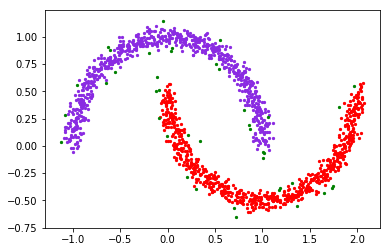

In [70]:
data = np.asarray(data)
labels = np.asarray(labels)
plt.scatter(data[np.where(labels == 1)][:, 0], data[np.where(labels == 1)][:, 1], c='r', s=5)
plt.scatter(data[np.where(labels == 2)][:, 0], data[np.where(labels == 2)][:, 1], c='blueviolet', s=5)
plt.scatter(data[np.where(labels == -1)][:, 0], data[np.where(labels == -1)][:, 1], c='g', s=5)
plt.savefig("DBSCAN.png")
plt.show()

# k-means++_spectral

In [32]:
def initCent(data, k):
    euclidean = np.ndarray(shape=(len(data), 0))
    allCent = np.ndarray(shape=(0,len(data[0])))
    first = data[np.random.choice(len(data), 1, replace=False)]
    allCent = np.concatenate((allCent, first), axis=0)
    repeatC = np.repeat(first, len(data), axis=0)
    deltaMat = abs(data-repeatC)
    euclideanMat = np.sqrt(np.square(deltaMat).sum(axis=1))
    indexNextC = (np.argmax(np.array(euclideanMat)))
    if(k>1):
        for a in range(1,k):
            nextC = np.matrix(data[np.asscalar(indexNextC),:])
            allCent = np.concatenate((allCent, nextC), axis=0)
            for i in range(0,len(allCent)):
                repeatC = np.repeat(allCent[i,:], len(data), axis=0)
                deltaMat = abs(data-repeatC)
                euclideanMat = np.sqrt(np.square(deltaMat).sum(axis=1))
                euclidean = np.concatenate((euclidean, euclideanMat), axis=1)
            euclideanFinal = np.min(np.array(euclidean), axis=1)
            indexNextC = np.argmax(np.array(euclideanFinal))
    result = allCent

    return result

def Simmilarity(data,sigma):
    nData = len(data)
    result = np.zeros((nData,nData))
    for i in range(nData):
        delta = np.matrix(abs(data[i]-data[:]))
        sqrEuclid = (np.square(delta).sum(axis=1)).reshape(1,1500)
        result[i] = np.exp(-(sqrEuclid)/(2*sigma**2))
    return result

def Tr2Spectral(laplacian):
    global k
    e_vals, e_vecs =  LA.eig(np.matrix(laplacian))
    ind = e_vals.real.argsort()[:k]
    result = np.zeros((len(laplacian),0))
    for i in range(1, len(ind)):
        cor_e_vec = np.transpose(np.matrix(e_vecs[:,np.asscalar(ind[i])]))
        result = np.concatenate((result, cor_e_vec), axis=1)
    return result

In [37]:
def plotResult(cluster, center, iteration, converged):
    n = len(cluster)
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.figure("result")
    plt.clf()
    fileName = 'kmeans++_spectral{:s}.png'.format(iteration)
    plt.title("iteration-" + iteration)
    for i in range(n):
        col = next(color)
        member = np.asmatrix(cluster[i])
        plt.scatter(np.ravel(member[:, 0]), np.ravel(member[:, 1]), s=5, c=col)
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    for i in range(n):
        col = next(color)
        plt.scatter(center[i, 0], center[i, 1], marker="*", s=30, c=col, edgecolors="black")
    if(converged == 0):
        plt.ion()
        plt.savefig(fileName)
        plt.show()
        plt.pause(0.1)
    if (converged == 1):
        plt.savefig(fileName)
        plt.show(block=True)

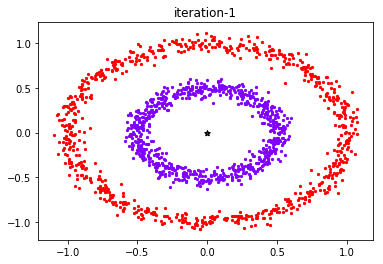

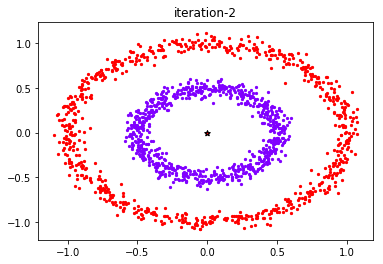

In [43]:
circle = np.asarray(circle)
moon = np.asarray(moon)

data = circle
k = 2
var = 0.1 #circle = 0.1
iteration = 0

simMat = Simmilarity(data,sigma)
degMat = np.diag(np.array(simMat.sum(axis=1)).ravel())
lapMat = degMat - simMat #unnormalizedLaplacian
DataT = Tr2Spectral(lapMat)
initC = initCentr(DataT, k)

nCluster = len(initC)
#looping until converged
while(True):
    iteration +=1
    euclidean = np.ndarray(shape=(len(DataT), 0))
    #assign data to cluster whose centroid is the closest one
    for i in range(0, nCluster):
        centRe = np.repeat(initC[i, :], len(DataT), axis=0)
        deltaMat = abs(DataT- centRe)
        euclideanMat = np.sqrt(np.square(deltaMat).sum(axis=1))
        euclidean = np.concatenate((euclidean, euclideanMat), axis=1)
    clusterMat = np.ravel(np.argmin(np.matrix(euclidean), axis=1))
    clusterT = [[] for i in range(k)]
    clusterOri = [[] for i in range(k)]
    for i in range(0, len(DataT)):#assign data to cluster regarding cluster matrix
        clusterT[np.asscalar(clusterMat[i])].append(np.array(DataT[i, :]).ravel())
        clusterOri[np.asscalar(clusterMat[i])].append(np.array(data[i, :]).ravel())
    #calculate new centroid
    newCTr = np.ndarray(shape=(0, len(initC[0])))
    newCOri = np.ndarray(shape=(0, len(data[0])))
    for i in range(0,nCluster):
        centroidTr = np.asmatrix(clusterT[i]).mean(axis=0)
        centroidOri = np.asmatrix(clusterOri[i]).mean(axis=0)
        newCTr = np.concatenate((newCTr, centroidTr), axis=0)
        newCOri = np.concatenate((newCOri, centroidOri), axis=0)
    plotResult(clusterOri, newCOri, str(iteration), 0)
    #break when converged
    if((initC == newCTr).all()):
        break
    # update new centroid
    initC = newCTr

# k-means++_kernel k

In [21]:
def initCentr(data, k):
    #centerMat = data[np.random.choice(len(data), k, replace=False)]
    euclidean = np.ndarray(shape=(len(data), 0))
    allCent = np.ndarray(shape=(0,len(data[0])))
    first = data[np.random.choice(len(data), 1, replace=False)]
    allCent = np.concatenate((allCent, first), axis=0)
    repeatC = np.repeat(first, len(data), axis=0)
    deltaMat = abs(data-repeatC)
    euclideanMat = np.sqrt(np.square(deltaMat).sum(axis=1))
    indexNextC = (np.argmax(np.matrix(euclideanMat)))
    if(k>1):
        for a in range(1,k):
            nextC = np.matrix(data[np.asscalar(indexNextC),:])
            allCent = np.concatenate((allCent, nextC), axis=0)
            for i in range(0,len(allCent)):
                repeatC = np.repeat(allCent[i,:], len(data), axis=0)
                deltaMat = abs(data-repeatC)
                euclideanMat = np.sqrt(np.square(deltaMat).sum(axis=1))
                euclidean = np.concatenate((euclidean, euclideanMat), axis=1)
            euclideanFinal = np.min(np.matrix(euclidean), axis=1)
            indexNextC = np.argmax(np.matrix(euclideanFinal))
    result = allCent
    return result

def RBF(data,sigma):
    nData = len(data)
    gramMat = np.zeros((nData,nData))
    for i in range(nData):
        delta = np.array(abs(data[i]-data[:]))
        sqrEuclid = (np.square(delta).sum(axis=1)).reshape(1,1500)
        gramMat[i] = np.exp(-(sqrEuclid)/(2*sigma**2))
    return gramMat

def plotshow(newCenter,clust,iteration):
    n = len(newCenter)
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    plt.clf()
    plt.title("iteration-" + iteration)
    fileName = 'kernelk++{:s}.png'.format(iteration)
    for i in range(n):
        col = next(color)
        memberC = np.asarray(clust[i])
        plt.scatter(memberC[:, 0], memberC[:, 1], s=8, c=col)
    color = iter(cm.rainbow(np.linspace(0, 1, n)))
    for i in range(n):
        col = next(color)
        plt.scatter(newCenter[i][0], newCenter[i][1], s=30, c=col, marker="*", edgecolors="black")
    plt.savefig(fileName)
    plt.show()

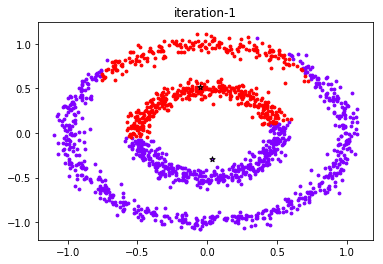

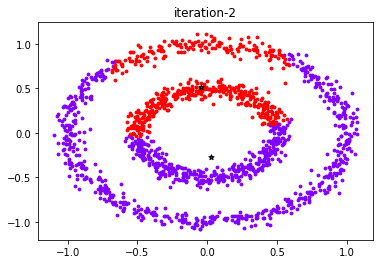

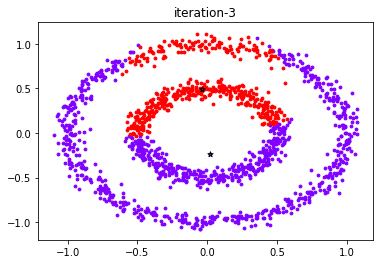

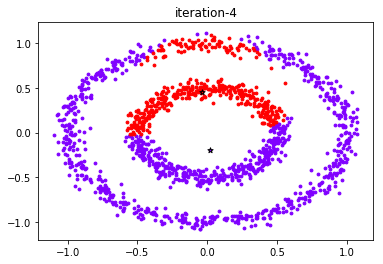

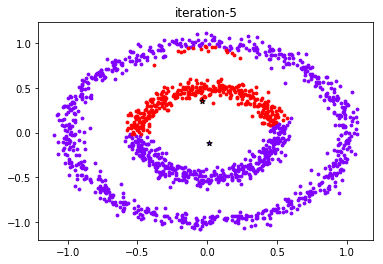

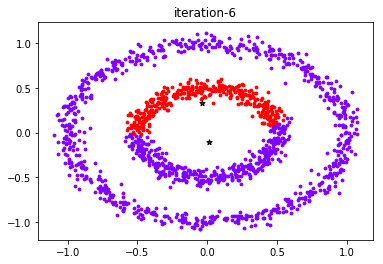

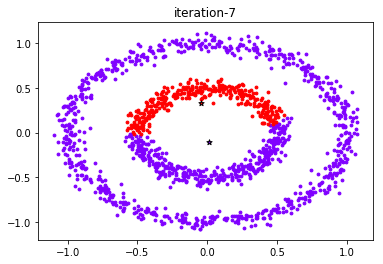

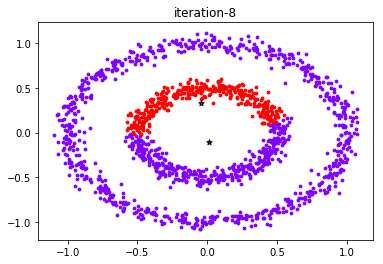

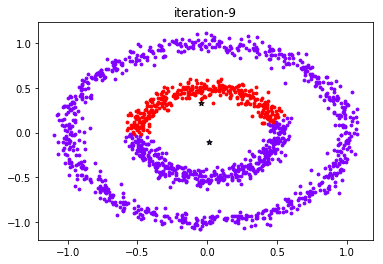

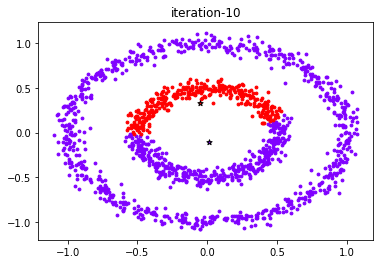

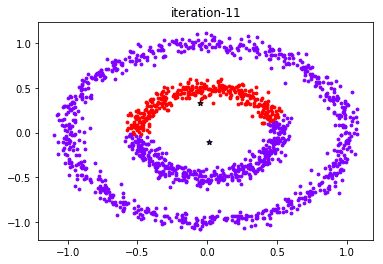

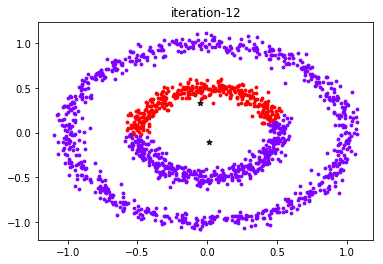

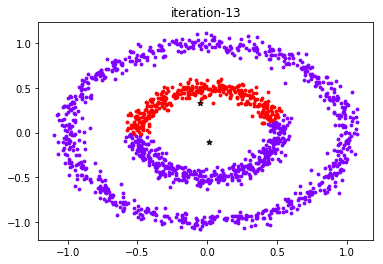

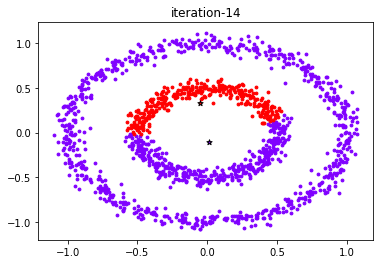

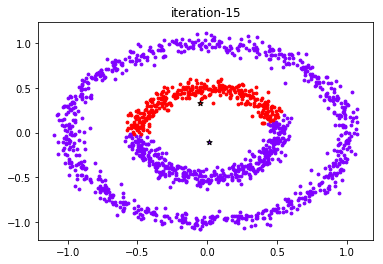

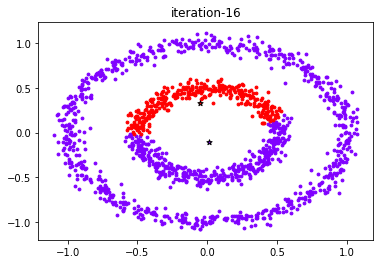

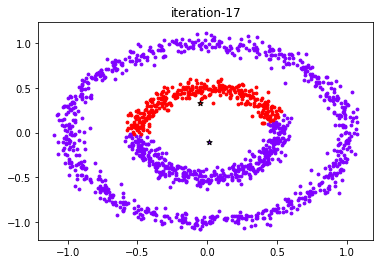

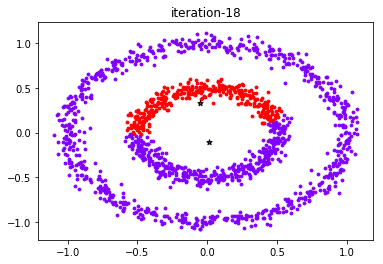

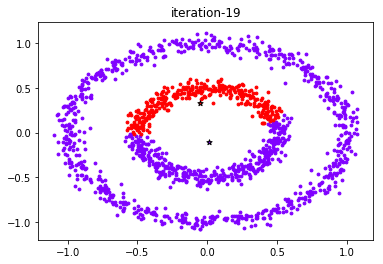

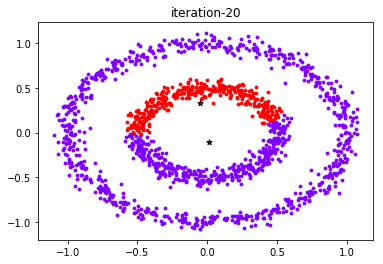

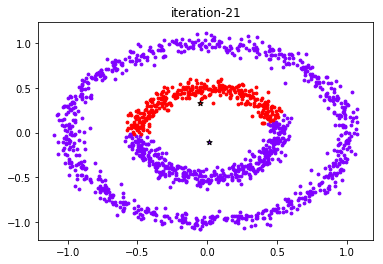

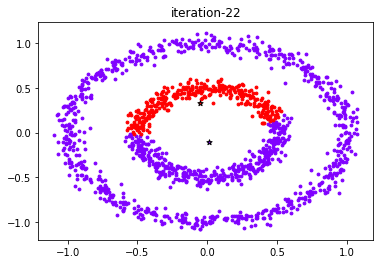

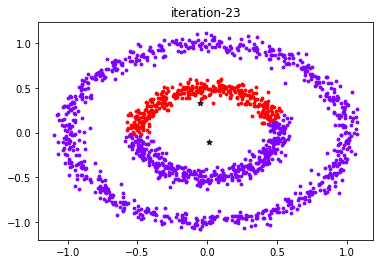

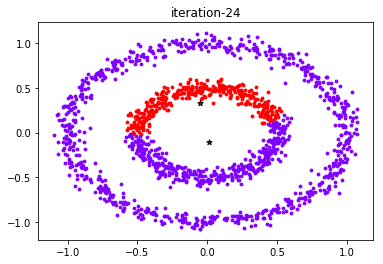

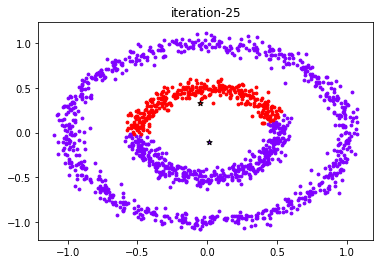

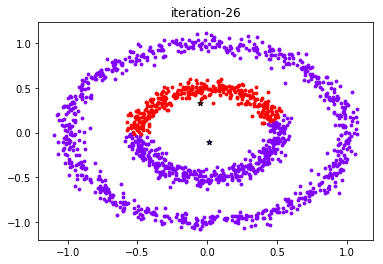

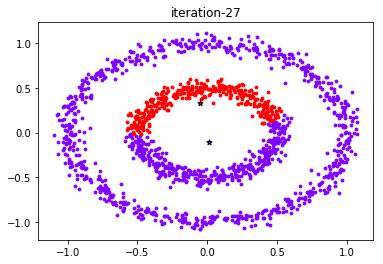

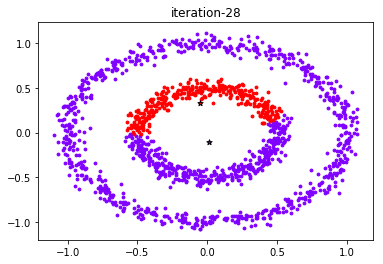

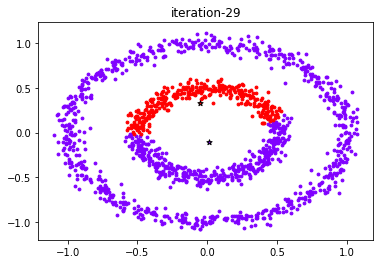

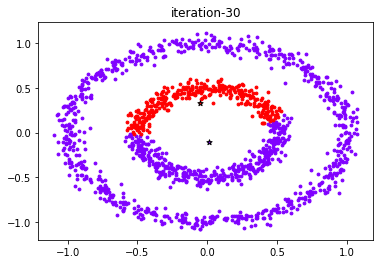

In [50]:
circle = np.asarray(circle)
moon = np.asarray(moon)

data = circle
k = 2
sigma = 0.22 # circle=0.15; moon =0.28
iteration = 0

clust = [[] for i in range(k)]
clustMat = [[] for i in range(k)]
newCenter = [[] for i in range(k)]
centerMat = np.zeros((k,len(data)))
newcenterMat = np.zeros((k,len(data)))

gramMat = RBF(data,sigma)# gramMat = 1500*1500
centerMat = initCentr(gramMat, k) #centerMat = k*1500

for ii in range(30):
    iteration+=1
    gramDist = [[] for i in range(k)] # gramDist = [[class0],[class1],[class2]] 
    for i in range(k):
        gramDist[i] = np.linalg.norm((gramMat-centerMat[i]),axis=1) 
    clustindex = np.argmin(gramDist, axis=0) #clustindex = 1500*1
    for i in range(k):
        clust[i] = data[np.where(clustindex[:] == i)]
        clustMat[i] = gramMat[np.where(clustindex[:] == i)]
    for i in range(k):
        newCenter[i]=(clust[i]).mean(axis=0)
        newcenterMat[i] = (clustMat[i]).mean(axis=0) #newcenterMat = k*1500
    plotshow(newCenter,clust,str(iteration))
    
    centerMat = newcenterMat

In [41]:
# kernel RBF
# k-means++ kernel k
# sprctral LA
# k=3
# report